### DoorDash Investment Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # <- would you have guessed sns ?


In [31]:
df = pd.read_csv("../Group Assignment/DASH_A1.csv")
df

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


In [32]:
print("Duplicates:", df.duplicated().sum())
print("Missing:", df.isnull().sum().sum())

Duplicates: 50
Missing: 108


In [33]:
df["Date"] = pd.to_datetime(df.Date)
df = df.set_index("Date").sort_index().drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1111 non-null   float64
 1   High    1110 non-null   float64
 2   Low     1119 non-null   float64
 3   Open    1119 non-null   float64
 4   Volume  1108 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB


/tmp/ipykernel_28740/203464963.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df.Date)


In [34]:
df[df.isnull().any(axis=1)]

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-17,154.210007,161.660004,NaN,159.100006,6369800.0
2021-01-13,NaN,215.500000,188.070007,192.410004,6058800.0
2021-02-05,NaN,190.916000,180.244995,189.570007,1521400.0
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
...,...,...,...,...,...
2025-04-11,180.490005,NaN,173.809998,178.520004,3451700.0
2025-04-25,187.759995,191.100006,NaN,187.220001,4515100.0
2025-05-01,196.199997,197.750000,NaN,194.404999,4151600.0


In [35]:
df.sort_index(inplace=True)

df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [36]:
df['Close'] = df["Close"].ffill()
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [37]:
df['YearMonth'] = df.index.to_period('M')
data_monthly = df.groupby('YearMonth')[['High', 'Low']].mean().reset_index()
df = df.reset_index()
df = pd.merge(df, data_monthly, on='YearMonth', how='left', suffixes=('', '_monthly_mean'))
df['High'] = df['High'].fillna(df['High_monthly_mean'])
df['Low'] = df['Low'].fillna(df['Low_monthly_mean'])

df.set_index('Date', inplace=True)


df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,2020-12,165.803438,152.148868
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868
...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702


In [38]:
rows_zero = df.loc[df["Open"].eq(df["Close"])]
rows_zero

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2025-01-09,173.720001,178.673632,174.31715,173.720001,NaN,2025-01,178.673632,174.31715


In [39]:
zeroVol = df['Volume'].isna() & (df["Open"] == df["Close"])
df.loc [zeroVol, 'Volume'] = 0

df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,2020-12,165.803438,152.148868
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868
...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702


In [40]:
rows_zero = df.loc[df["Open"].eq(df["Close"])]
rows_zero

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2025-01-09,173.720001,178.673632,174.31715,173.720001,0.0,2025-01,178.673632,174.31715


In [41]:
median_test = df.loc[df['Volume'].isna() & (df["Open"] != df["Close"])]
median_test

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean
Date,,,,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,2020-12,165.803438,152.148868
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN,2021-03,145.023173,134.252096
2021-07-09,178.559998,181.649994,176.539993,180.660004,NaN,2021-07,181.732048,175.027189
2021-08-02,174.289993,179.529999,169.800003,175.350006,NaN,2021-08,189.265226,181.609591
2021-08-25,188.250000,190.119995,184.550003,185.449997,NaN,2021-08,189.265226,181.609591
2021-10-08,204.419998,207.990005,204.149994,204.899994,NaN,2021-10,210.988051,204.159999
2022-05-02,82.260002,85.370003,78.790001,81.620003,NaN,2022-05,74.154143,66.352143
2022-07-25,71.760002,73.920789,70.349998,73.120003,NaN,2022-07,73.920789,69.314899
2022-10-24,44.430000,44.959999,41.365002,44.599998,NaN,2022-10,48.385250,45.637381


In [42]:
median_vol =df["Volume"].median()
median_test = df['Volume'].isna() & (df["Open"] != df["Close"])

df.loc[median_test,"Volume"] = median_vol

#Test
print(df.Volume, '2020-12-20')


Date
2020-12-09    25373700.0
2020-12-10     3506600.0
2020-12-11     4760600.0
2020-12-14     7859600.0
2020-12-15     5017000.0
                 ...    
2025-06-09     2710300.0
2025-06-10     3916700.0
2025-06-11     3091500.0
2025-06-12     2510400.0
2025-06-13      616326.0
Name: Volume, Length: 1134, dtype: float64 2020-12-20


In [43]:
median_test = df['Volume'].isna() & (df["Open"] != df["Close"])
median_test

Date
2020-12-09    False
2020-12-10    False
2020-12-11    False
2020-12-14    False
2020-12-15    False
              ...  
2025-06-09    False
2025-06-10    False
2025-06-11    False
2025-06-12    False
2025-06-13    False
Length: 1134, dtype: bool

## Enginering


In [44]:
# 1. Simple Daily Returns
df['Returns'] = df.Close.pct_change()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns
Date,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938
...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165


In [45]:
# 2. Logarithmic Returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns
Date,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079


In [46]:
# 3. 20-Day Momentum
df['20-day momentum'] = df.Close-df.Close.shift(20)
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum
Date,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000


In [47]:
# 4. 20-Day Simple Moving Average
df['20-Day Simple Moving Average'] = df.Close.rolling(20).mean()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average
Date,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498


In [48]:
# 5. 20-Day Rolling Volatility
df['20-Day Rolling Volatility'] = df.Close.rolling(20).std()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility
Date,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998,7.886279
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498,7.341377
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498,7.304940


In [49]:
# 6. Day of the Week
df['Day'] = df.index.day_name()
df

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,165.803438,152.148868,NaN,NaN,NaN,NaN,NaN,Wednesday
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,165.803438,152.148868,-0.018521,-0.018695,NaN,NaN,NaN,Thursday
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,165.803438,152.148868,-0.059140,-0.060961,NaN,NaN,NaN,Friday
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,165.803438,152.148868,-0.085714,-0.089612,NaN,NaN,NaN,Monday
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,165.803438,152.148868,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,219.088877,213.170702,-0.004395,-0.004404,33.970001,206.409998,7.886279,Monday
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,219.088877,213.170702,-0.011587,-0.011654,22.869995,207.553498,7.341377,Tuesday
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,219.088877,213.170702,0.013165,0.013079,20.000000,208.553498,7.304940,Wednesday


In [50]:
# 7. Price Surge Identification
Return_Threshold = df.Returns.mean() +4*df.Returns.std()
df[df['Returns'] > Return_Threshold]

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2021-01-12,191.990005,201.929993,162.615005,165.500000,7081800.0,2021-01,191.348631,172.424631,0.149641,0.139450,16.990005,154.739500,12.446499,Tuesday
2021-05-14,141.070007,146.630005,123.570000,125.000000,15264700.0,2021-05,137.700264,128.870000,0.221491,0.200072,-8.419998,138.449501,14.755416,Friday
2023-11-02,87.790001,90.339996,84.389999,85.089996,12346100.0,2023-11,92.605714,89.375050,0.156653,0.145531,13.980003,75.925500,4.015746,Thursday


In [51]:
# 8. Volume Spike Identification
Volume_Threshold = df.Volume.mean()+6*df.Volume.std()

df[df['Volume'] > Volume_Threshold]

,Close,High,Low,Open,Volume,YearMonth,High_monthly_mean,Low_monthly_mean,Returns,Log_Returns,20-day momentum,20-Day Simple Moving Average,20-Day Rolling Volatility,Day
Date,,,,,,,,,,,,,,
2022-02-17,105.029999,116.000000,100.529999,115.600998,47405700.0,2022-02,104.549420,95.623790,0.106861,0.101528,-21.750000,103.309499,7.700510,Thursday
2023-12-15,101.570000,103.309998,100.220001,102.739998,30556000.0,2023-12,101.082685,98.451450,-0.001867,-0.001869,6.480003,97.266250,2.885046,Friday
2025-03-21,190.619995,194.399994,187.197006,190.720001,73637400.0,2025-03,192.537286,183.494096,-0.011973,-0.012045,-9.320007,189.258000,7.074886,Friday


In [52]:
# 9. Boillinger Band Calculation
df['SMA'] = df['Close'].rolling(window=20).mean()
df['Dev'] = df['Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

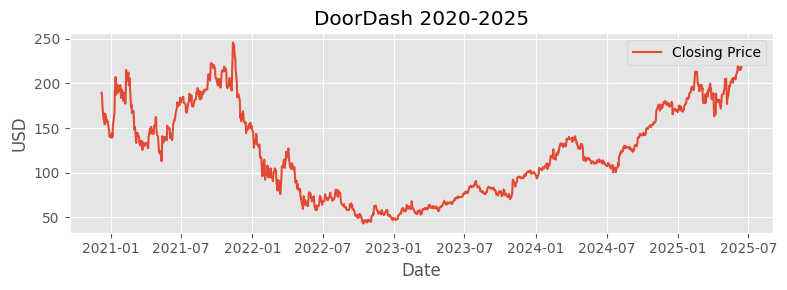

In [53]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 3))
plt.title("DoorDash 2020-2025")
plt.xlabel("Date")
plt.ylabel("USD")

# Plot the closing price
plt.plot(df.Close, label="Closing Price")

# Add a legend to the plot
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

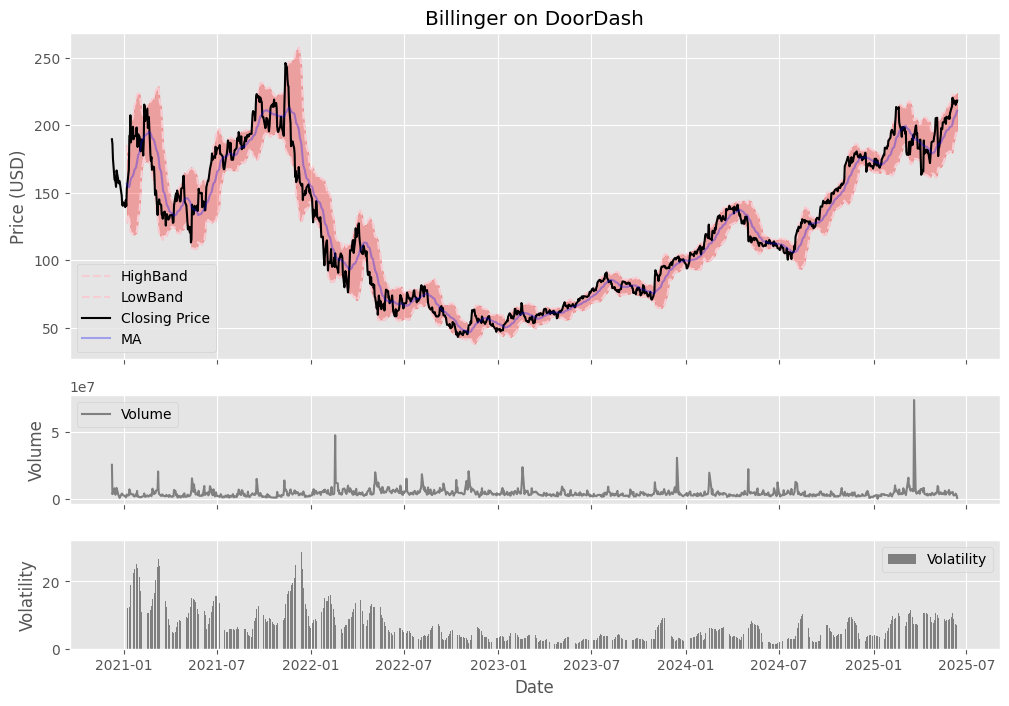

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- Main Plot: Bollinger Bands ---
ax1.set_title("Billinger on DoorDash")
ax1.set_ylabel("Price (USD)")
ax1.plot(df.HighBand, label="HighBand", color="#F7CCD2", linestyle="--")
ax1.plot(df.LowBand, label="LowBand", color="#F7CCD2", linestyle="--")
ax1.fill_between(df.index, df.HighBand, df.LowBand, color="red", alpha=0.3)
ax1.plot(df.Close, label="Closing Price", color="black")
ax1.plot(df.SMA, label="MA", color="blue", alpha=0.3)
ax1.legend()

# --- Subplot 2: Volume ---
ax2.set_ylabel("Volume")
ax2.plot(df.Volume, label="Volume", color="grey")
ax2.legend()

# --- Subplot 3: Volatility ---
ax3.set_ylabel("Volatility")
ax3.set_xlabel("Date")
ax3.bar(df.index,df.Dev, label="Volatility", color="grey")
ax3.legend()

plt.show()

## Key Dates

In [55]:
# 1. Highest Volatility Day
df['Vol'] = df['Close'].pct_change().rolling(window=30).std()
Highest_Volatility = (
    df.assign(Year=df.index.year)
    .groupby('Year')['Vol']
    .agg(PeakVol='max', PeakDate=lambda s: s.idxmax())
    .reset_index()
    )
print(Highest_Volatility)


   Year   PeakVol   PeakDate
0  2020       NaN        NaT
1  2021  0.063581 2021-02-23
2  2022  0.074802 2022-06-16
3  2023  0.043803 2023-02-23
4  2024  0.029236 2024-03-11
5  2025  0.044465 2025-05-08


/tmp/ipykernel_28740/2429763756.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  .agg(PeakVol='max', PeakDate=lambda s: s.idxmax())


In [56]:
# 2. Largest Price Surge Day
df['DailyReturn'] = df['Close'].pct_change()
Largest_PS = (df.assign(Year=df.index.year).groupby('Year')['DailyReturn'].agg(PeakReturn='max', PeakDate=lambda s: s.idxmax()).reset_index())
print(Largest_PS)


   Year  PeakReturn   PeakDate
0  2020    0.078724 2020-12-18
1  2021    0.221491 2021-05-14
2  2022    0.134512 2022-03-16
3  2023    0.156653 2023-11-02
4  2024    0.083457 2024-08-02
5  2025    0.137738 2025-04-09


In [57]:
# 3. Largest Price Drop Day
drop_day = (df.groupby(df.index.year)['DailyReturn'].agg(DropValue='min', DropDate=lambda s: s.idxmin()).reset_index(names='Year'))
print(drop_day)


   Year  DropValue   DropDate
0  2020  -0.085714 2020-12-14
1  2021  -0.135457 2021-02-22
2  2022  -0.131621 2022-05-11
3  2023  -0.075946 2023-02-17
4  2024  -0.103170 2024-05-02
5  2025  -0.080634 2025-04-03


In [58]:
# 4. Highest Volume Day
highest_volume_per_year = (df.groupby(df.index.year)['Volume'].agg(MaxVolume='max',  MaxDate=lambda s: s.idxmax()).reset_index(names='Year'))
print(highest_volume_per_year)


   Year   MaxVolume    MaxDate
0  2020  25373700.0 2020-12-09
1  2021  20400000.0 2021-03-09
2  2022  47405700.0 2022-02-17
3  2023  30556000.0 2023-12-15
4  2024  22134800.0 2024-05-02
5  2025  73637400.0 2025-03-21


In [59]:
# 5. Highest High and Lowest Low
hi_lo_per_year = (
    df.groupby(df.index.year)
      .agg(HighestHigh=('High', 'max'), HighDate   =('High', lambda s: s.idxmax()), LowestLow  =('Low',  'min'), LowDate    =('Low',  lambda s: s.idxmin()))
      .reset_index(names='Year'))
print(hi_lo_per_year)


   Year  HighestHigh   HighDate   LowestLow    LowDate
0  2020   195.500000 2020-12-09  135.380005 2020-12-31
1  2021   257.250000 2021-11-15  110.129997 2021-05-13
2  2022   152.494995 2022-01-12   41.365002 2022-10-24
3  2023   103.980003 2023-12-11   45.931999 2023-01-06
4  2024   181.779999 2024-12-17   93.330002 2024-01-04
5  2025   220.880005 2025-06-06  155.399994 2025-04-07


In [60]:
# 6. Annual Open and Close
annual_open_close = (df.groupby(df.index.year).agg(YearOpen=('Open', 'first'),YearClose=('Close', 'last')).reset_index(names='Year'))
print(annual_open_close)

   Year    YearOpen   YearClose
0  2020  182.000000  142.750000
1  2021  142.500000  148.899994
2  2022  149.610001   48.820000
3  2023   49.980000   98.889999
4  2024   97.800003  167.750000
5  2025  168.789993  218.119995


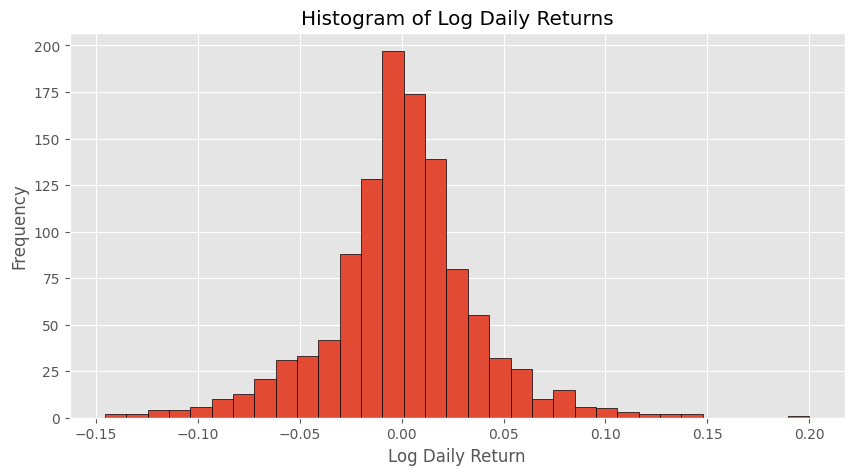

In [63]:
log_ret = df['Log_Returns'].dropna() 
bins = int(np.sqrt(len(log_ret)))
plt.figure(figsize=(10, 5))
plt.hist(log_ret, bins=bins, edgecolor='k')
plt.title("Histogram of Log Daily Returns")
plt.xlabel("Log Daily Return")
plt.ylabel("Frequency")
plt.show()

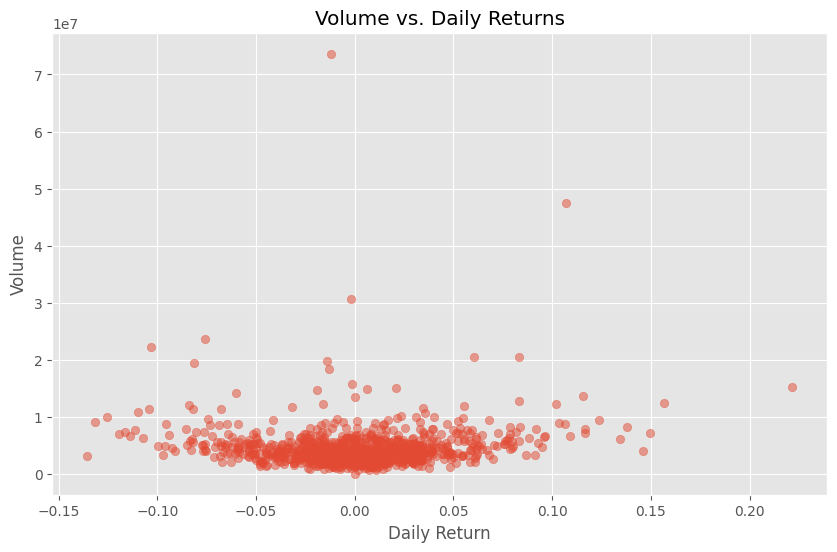

In [69]:
scatter_data = df.dropna(subset=['Returns'])

# Create scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Returns'],scatter_data['Volume'], alpha=0.5)
plt.title('Volume vs. Daily Returns')
plt.ylabel('Volume')
plt.xlabel('Daily Return')
plt.grid(True)
plt.show()